# Self-Driving Car Engineer Nanodegree

# Deep Learning

## Project : Build a Traffic Sign Recognition Classifier

## Step 1: Load The Data

In [1]:
import pickle

# Fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

## Step 2: Dataset Exploration by determining Summary & Vizualization

### 2.1 Summarizing the Dataset

In [2]:
def getDatasetInfo():
    # Get the number of training examples
    n_train = len(X_train)

    # Get the number of validation examples
    n_validation = len(X_valid)

    # Get the number of testing examples.
    n_test = len(X_test)

    # Get the shape of an traffic sign image?
    image_shape = X_train[1].shape

    # Get the number of unique classes/labels there are in the dataset.
    n_classes = len(set(y_train))

    print("Summary statistics of the traffic signs dataset")
    print()
    print("Number of training examples =", n_train)
    print("Number of testing examples =", n_test)
    print("Number of validation examples =", n_validation)
    print("Image data shape =", image_shape)
    print("Number of classes =", n_classes)

getDatasetInfo()

Summary statistics of the traffic signs dataset

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### 2.2 Visualizing the dataset

Loading a random image in color along with its index

(32, 32, 3)
10


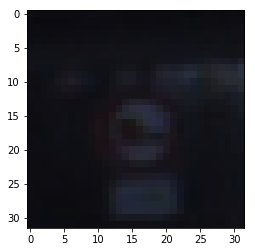

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random
import numpy as np

randomIndex = random.randint(0, len(X_train))
image = X_train[randomIndex].squeeze()
#plt.figure(figsize=(2,2))
plt.imshow(image)

print(image.shape)
print(y_train[randomIndex])

----

## Step 3: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Model Architecture

### 3.1 Preprocessing the image

### 3.1.1 Normalizing Functions

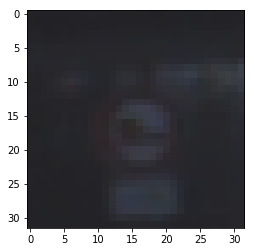

(32, 32, 3)


In [4]:
# Implement Min-Max scaling for grayscale image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    #print("Image Data")
    #print(image_data)
    normalized_grayscale_image = a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ))
    #print("Normalized Grayscale Image")
    return normalized_grayscale_image
    
def normalize(image_data):
    #print("Image Data")
    #print(image_data)
    normalizedOutput = (image_data - 128)/128
    #print("Normalized Image Data")
    #print(normalizedOutput)
    return normalizedOutput

normalized_image = normalize_grayscale(image)
plt.imshow(normalized_image)
plt.show()
print(normalized_image.shape)

### 3.1.2 Flipping Image

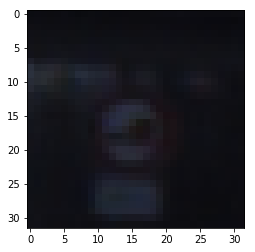

(32, 32, 3)


In [5]:
def flipImage(image):
    flipped_image = np.fliplr(image)
    return flipped_image

flipped_image = flipImage(image)
plt.imshow(flipped_image)
plt.show()
print(flipped_image.shape)

In [6]:
# Shuffling the data
from sklearn.utils import shuffle
X_train, y_train = shuffle (X_train, y_train)

In [7]:
# Normalize training data
X_train = normalize_grayscale(X_train)
X_test = normalize_grayscale(X_test)
X_valid = normalize_grayscale(X_valid)

#X_train = flipImage(X_train)
#X_test = flipImage(X_test)
#X_valid = flipImage(X_valid)

getDatasetInfo()

Summary statistics of the traffic signs dataset

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Setup TensorFlow

In [8]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 150
keep_prob = 0.9 #dropout

In [9]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print("ConvNet 1: ", conv1)
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    print("ConvNet 2: ", conv2)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    print("Fully Connected 0: ", fc0)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.dropout(fc1, keep_prob) #keep_prob should be set to one for validation accuracy
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    print("Fully Connected 1: ", fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    print("Fully Connected 2: ", fc2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    print("Logits: ", logits)
    
    return logits

### Features and Labels 

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

### Training Pipeline

In [12]:
rate_of_learning = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate_of_learning)
training_operation = optimizer.minimize(loss_operation)

ConvNet 1:  Tensor("add:0", shape=(?, 28, 28, 6), dtype=float32)
ConvNet 2:  Tensor("add_1:0", shape=(?, 10, 10, 16), dtype=float32)
Fully Connected 0:  Tensor("Flatten/Reshape:0", shape=(?, 400), dtype=float32)
Fully Connected 1:  Tensor("Relu_2:0", shape=(?, 120), dtype=float32)
Fully Connected 2:  Tensor("Relu_3:0", shape=(?, 84), dtype=float32)
Logits:  Tensor("add_4:0", shape=(?, 43), dtype=float32)


### Evaluating the Model

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model. Before each epoch, the training set is shuffled.
After each epoch, the loss is measured and the accuracy of the validation set determined. 
The model is the saved for future runs. 

In [14]:
training_save_file = './lenet.ckpt'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        #training_accuracy = evaluate(X_train, y_train)
        #testing_accuracy = evaluate(X_test, y_test)        
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        #print("Training Accuracy = {:.3f}".format(training_accuracy))
        #print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, training_save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.435

EPOCH 2 ...
Validation Accuracy = 0.701

EPOCH 3 ...
Validation Accuracy = 0.762

EPOCH 4 ...
Validation Accuracy = 0.802

EPOCH 5 ...
Validation Accuracy = 0.824

EPOCH 6 ...
Validation Accuracy = 0.833

EPOCH 7 ...
Validation Accuracy = 0.849

EPOCH 8 ...
Validation Accuracy = 0.864

EPOCH 9 ...
Validation Accuracy = 0.877

EPOCH 10 ...
Validation Accuracy = 0.875

EPOCH 11 ...
Validation Accuracy = 0.877

EPOCH 12 ...
Validation Accuracy = 0.881

EPOCH 13 ...
Validation Accuracy = 0.890

EPOCH 14 ...
Validation Accuracy = 0.884

EPOCH 15 ...
Validation Accuracy = 0.894

EPOCH 16 ...
Validation Accuracy = 0.901

EPOCH 17 ...
Validation Accuracy = 0.901

EPOCH 18 ...
Validation Accuracy = 0.911

EPOCH 19 ...
Validation Accuracy = 0.907

EPOCH 20 ...
Validation Accuracy = 0.918

EPOCH 21 ...
Validation Accuracy = 0.910

EPOCH 22 ...
Validation Accuracy = 0.915

EPOCH 23 ...
Validation Accuracy = 0.912

EPOCH 24 ...
Validation Accura

### Evaluating Performance of the Model

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    training_accuracy = evaluate(X_train, y_train)
    test_accuracy = evaluate(X_test, y_test)
    validation_accuracy = evaluate(X_valid, y_valid)
    
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Training Accuracy = 0.993
Test Accuracy = 0.918
Validation Accuracy = 0.933


## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 4)


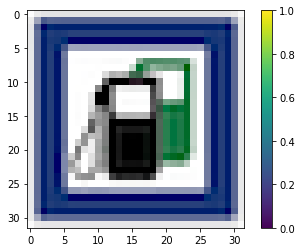

(32, 32, 4)


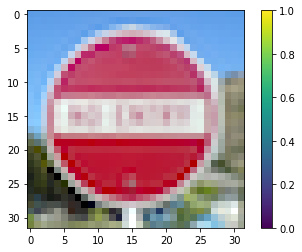

(32, 32, 4)


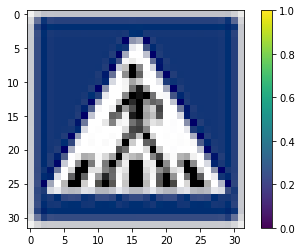

(32, 32, 4)


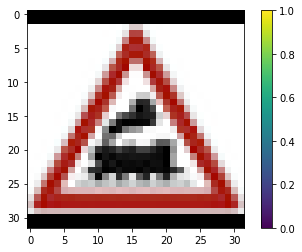

(32, 32, 4)


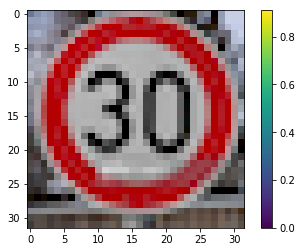

(32, 32, 4)


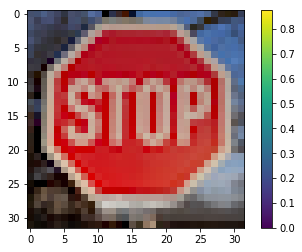

(6, 32, 32, 3)


In [51]:
import cv2
import os 
import matplotlib.image as mpimage

directory = "german-traffic-signs/"
new_images = os.listdir(directory)
# Retrieve only images with valid image extensions
image_extenstions = ['jpg', 'bmp', 'png', 'gif']
new_images = [imgname for imgname in os.listdir(directory)
              if any(imgname.endswith(ext) for ext in image_extenstions)]

# Show the images, add to a list to process for classifying
new_images_data = []

for image in new_images:
    imagePath = directory + image
    image = mpimage.imread(imagePath)
    
    print(image.shape)
    # Remove alpha channel from image so it only has 3 RGB channels
    # Length of grayscale images is 2 i.e., len(image.shape) == 2
    if len(image.shape) > 2 and image.shape[2] == 4:
    #convert the image from RGBA2RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
    new_images_data.append(image)
    plt.imshow(image)
    plt.colorbar()
    plt.show()

# Convert the new_images data to match the LeNet training dataset image shape (32 x 32 x 3)
#print(new_images_data)
new_images_data = np.array(new_images_data)
print(new_images_data.shape)

### Predict the Sign Type for Each Image

In [52]:
signNames = np.genfromtxt("signnames.csv", dtype=None, delimiter=",", names=True)
#signName = [name[1].decode('utf-8') for name in signNames]
for i in range(0, len(signNames)):
    print(signNames[i])

(0, b'Speed limit (20km/h)')
(1, b'Speed limit (30km/h)')
(2, b'Speed limit (50km/h)')
(3, b'Speed limit (60km/h)')
(4, b'Speed limit (70km/h)')
(5, b'Speed limit (80km/h)')
(6, b'End of speed limit (80km/h)')
(7, b'Speed limit (100km/h)')
(8, b'Speed limit (120km/h)')
(9, b'No passing')
(10, b'No passing for vehicles over 3.5 metric tons')
(11, b'Right-of-way at the next intersection')
(12, b'Priority road')
(13, b'Yield')
(14, b'Stop')
(15, b'No vehicles')
(16, b'Vehicles over 3.5 metric tons prohibited')
(17, b'No entry')
(18, b'General caution')
(19, b'Dangerous curve to the left')
(20, b'Dangerous curve to the right')
(21, b'Double curve')
(22, b'Bumpy road')
(23, b'Slippery road')
(24, b'Road narrows on the right')
(25, b'Road work')
(26, b'Traffic signals')
(27, b'Pedestrians')
(28, b'Children crossing')
(29, b'Bicycles crossing')
(30, b'Beware of ice/snow')
(31, b'Wild animals crossing')
(32, b'End of all speed and passing limits')
(33, b'Turn right ahead')
(34, b'Turn left ahe

In [53]:
# Preprocess new_images by normalizing
new_images_data = normalize_grayscale(new_images_data)
print(new_images_data.shape)

(6, 32, 32, 3)


In [55]:
# Testing the model on the new images
probability_to_keep = tf.placeholder(tf.float32)
with tf.Session() as sess:
    saver.restore(sess, training_save_file)
    new_images_classification = sess.run(logits, feed_dict={x: new_images_data, probability_to_keep : 1.0})
print(new_images_classification)

[[-14.97333622  -5.89169168  -7.53392982   3.34016252 -19.42725563
    2.50475073 -10.63559628  -8.66358757  -6.27891827  -6.27930117
  -12.66362381  -2.61146903  -3.50598001  -3.6780386  -11.52139854
   -7.94021988 -15.12715054 -12.23885632  -4.17908144 -14.23377228
   -6.34340906 -14.67193699 -17.6199131  -11.1149683  -17.59391785
   -7.98273516 -14.00596905 -14.08745766  -4.0502615  -11.2374239
   -3.23368406 -14.13599205  -2.43184781 -16.91756821  -9.04524136
   -7.72005272 -10.61862564 -26.24948692  -5.01314449 -25.65127563
  -18.91209793  -9.60123253 -11.93048477]
 [ -8.597332     0.3867785   -6.58529758   2.67438078  -8.88545418
   -0.97532713  -6.17954636  -5.22900295  -5.59259748  -6.44268179
  -10.82043266  -6.14779186  -3.03679872  -0.90575981  -3.68182397
   -7.95844936  -9.25977135  -5.24047661  -5.74785233  -9.91099453
  -11.80425644 -11.42509651 -16.15864754 -12.55391121 -18.38013458
   -7.27523565 -10.35163689 -13.80836296  -6.78624058 -10.05356884
   -3.98086882 -12.24

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [57]:
##Applying softmax to logits
with tf.Session() as sess:
    softmax_probs = sess.run(tf.nn.softmax(new_images_classification))
print(softmax_probs)

[[  7.70587061e-09   6.77532298e-05   1.31133984e-05   6.92266703e-01
    8.96415789e-11   3.00233185e-01   5.89764511e-07   4.23751408e-06
    4.60002120e-05   4.59825787e-05   7.76099540e-08   1.80099579e-03
    7.36260321e-04   6.19879866e-04   2.43208973e-07   8.73505633e-06
    6.60725386e-09   1.18683850e-07   3.75584088e-04   1.61439804e-08
    4.31272383e-05   1.04164020e-08   5.46296453e-10   3.65165732e-07
    5.60683722e-10   8.37146308e-06   2.02742090e-08   1.86876310e-08
    4.27221588e-04   3.23078609e-07   9.66691819e-04   1.78022965e-08
    2.15536682e-03   1.10268861e-09   2.89308355e-06   1.08863696e-05
    5.99858595e-07   9.76454635e-14   1.63109173e-04   1.77603686e-13
    1.50051249e-10   1.65919369e-06   1.61553245e-07]
 [  1.04830933e-05   8.36063623e-02   7.83980649e-05   8.23630333e-01
    7.85886004e-06   2.14133374e-02   1.17630625e-04   3.04324145e-04
    2.11557912e-04   9.04153931e-05   1.13503472e-06   1.21425990e-04
    2.72520073e-03   2.29560435e-02 

In [59]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
## Finding top_k on the softmax outputs
with tf.Session() as sess:
    #predictions = sess.run(tf.nn.top_k(tf.constant(new_images_classification), k=5))
    predictions = sess.run(tf.nn.top_k(tf.constant(softmax_probs), k=5))
for i in range(len(predictions[0])):
    print('The image', i, 'is about', predictions[0][i], 'chance to be the sign with index:', predictions[1][i])

The image 0 is about [ 0.6922667   0.30023319  0.00215537  0.001801    0.00096669] chance to be the sign with index: [ 3  5 32 11 30]
The image 1 is about [ 0.82363033  0.08360636  0.04133265  0.02295604  0.02141334] chance to be the sign with index: [ 3  1 32 13  5]
The image 2 is about [ 0.95035684  0.01710486  0.01516867  0.00725479  0.00688135] chance to be the sign with index: [18  1 12 11 31]
The image 3 is about [ 0.88734788  0.09415069  0.01257696  0.00161749  0.00147223] chance to be the sign with index: [ 3  5 18 30 11]
The image 4 is about [  9.28528726e-01   6.53521493e-02   1.69922085e-03   9.00210172e-04
   8.63650115e-04] chance to be the sign with index: [ 3  5 31 12 25]
The image 5 is about [ 0.47229764  0.24313045  0.13881393  0.04215979  0.0407932 ] chance to be the sign with index: [ 3  5  2 12  1]
